In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel,chi2,f_classif,SelectKBest,VarianceThreshold
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,roc_auc_score
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
df=pd.read_csv(r"../input/loan-prediction-with-3-problem-statement/training_set.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
property_Area         object
Loan_Status           object
dtype: object

In [5]:
df.drop('Loan_ID',inplace=True,axis=1)

In [6]:
categorical = [i for i in df.columns if df[i].dtype =='object']
numerical = [i for i in df.columns if df[i].dtype !='object']

In [7]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,612.000000,613.000000,592.000000,600.00000,564.000000
mean,5405.540850,1620.888940,146.412162,342.00000,0.842199
std,6118.914057,2928.624748,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2875.750000,0.000000,100.000000,360.00000,1.000000
50%,3806.000000,1167.000000,128.000000,360.00000,1.000000
75%,5803.750000,2302.000000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
df.isnull().sum()

Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
property_Area         0
Loan_Status           0
dtype: int64

In [9]:
df1=df.copy()

In [10]:
for i in df1.columns:
    if i in categorical:
        df1[i].fillna(df1[i].mode()[0],inplace=True)
    elif i in numerical:
        df1[i].fillna(df1[i].median(),inplace=True)

In [11]:
df1.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
property_Area        0
Loan_Status          0
dtype: int64

### EDA

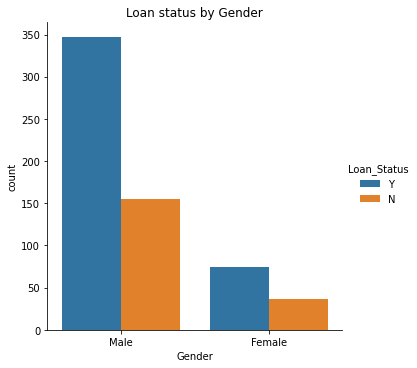

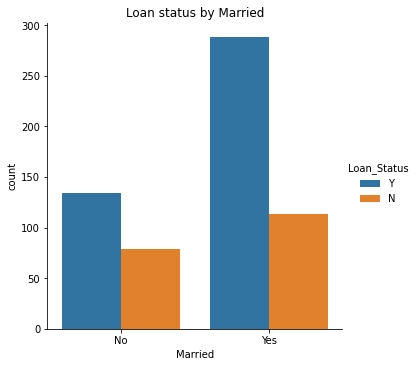

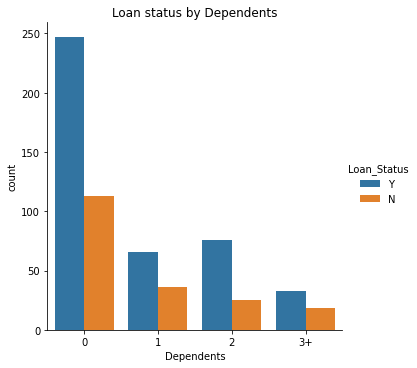

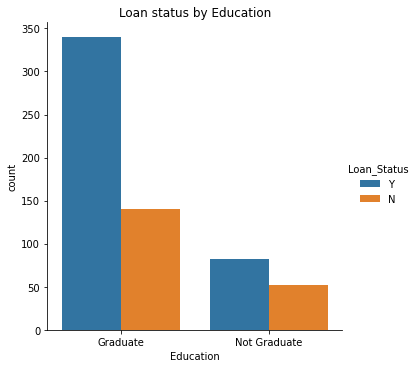

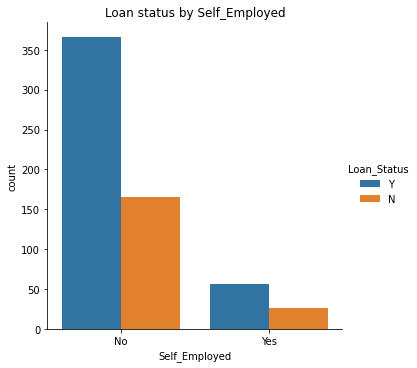

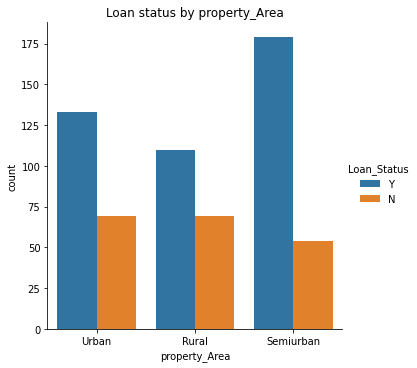

In [12]:
#categorical
for i in categorical:
    if i !='Loan_Status':
        sns.catplot(x =i,hue ="Loan_Status",kind='count',data = df1).set(title='Loan status by '+i )
        

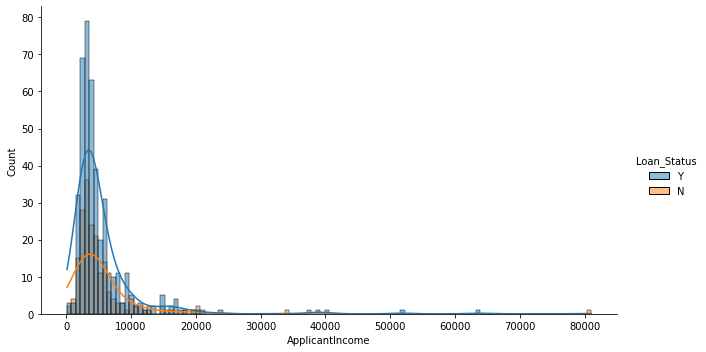

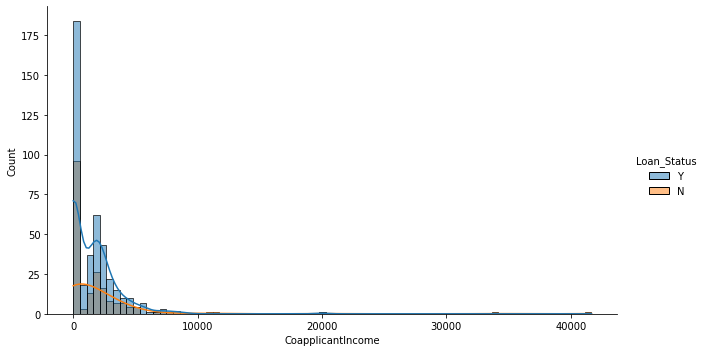

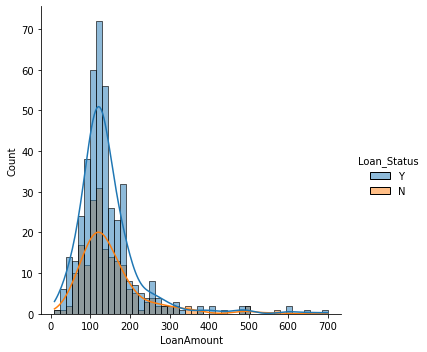

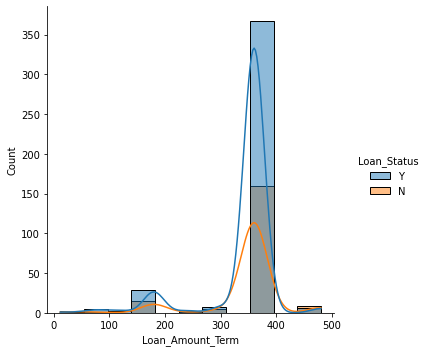

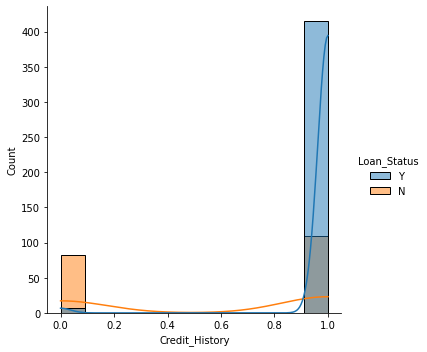

In [13]:
for i in numerical:
    if i=='ApplicantIncome' or i=='CoapplicantIncome':
        sns.displot(data=df1, x=i, kde=True,aspect=20/11.27,hue='Loan_Status')
    else:
        sns.displot(data=df1, x=i, kde=True,hue='Loan_Status')

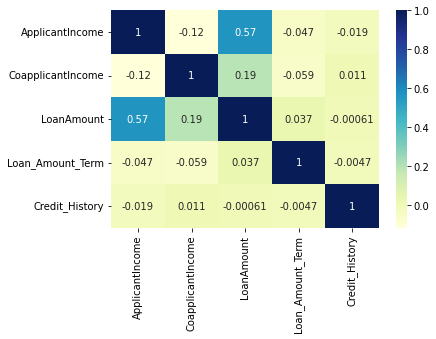

In [14]:
dataplot = sns.heatmap(df1.corr(), cmap="YlGnBu", annot=True)
plt.show()

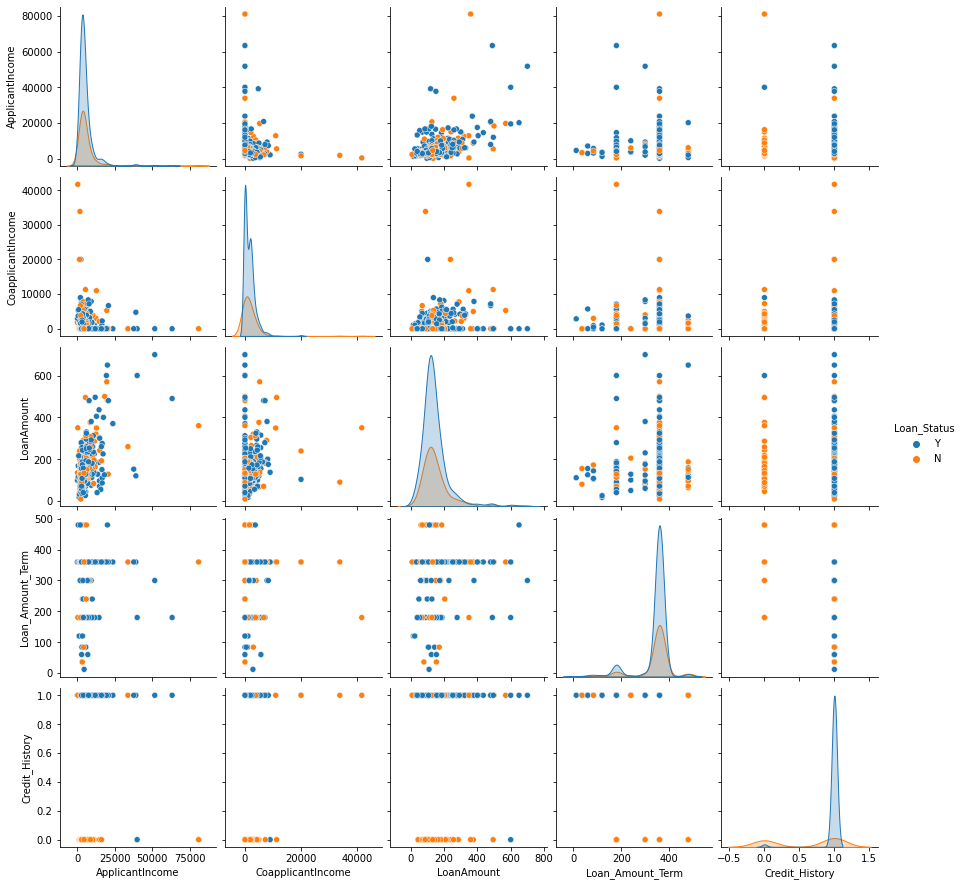

In [15]:
## multivariate
sns.pairplot(df1,hue="Loan_Status")

### Feature Engineering

In [16]:
# missing Value Imputation 
for i in df.columns:
    if df[i].dtype!='object':
        df[i].fillna(df[i].median(),inplace=True)
    else:
        df[i].fillna(df[i].mode()[0],inplace=True)

In [17]:
# Transform to normal
from sklearn.preprocessing import PowerTransformer
yeojohnTr = PowerTransformer(standardize=True)
for i in numerical:
    df[i]=yeojohnTr.fit_transform(df[i].values.reshape(-1,1))

In [18]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
0,Male,No,0,Graduate,No,0.545668,-1.102801,-0.025462,0.175540,0.411733,Urban,Y
1,Male,Yes,1,Graduate,No,-0.118293,0.750974,-0.025462,0.175540,0.411733,Rural,N
2,Male,Yes,0,Graduate,Yes,-0.498694,-1.102801,-1.339826,0.175540,0.411733,Urban,Y
3,Male,Yes,0,Not Graduate,No,-0.742697,0.892077,-0.155876,0.175540,0.411733,Urban,Y
4,Male,No,0,Graduate,No,0.584147,-1.102801,0.170931,0.175540,0.411733,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,-0.553641,-1.102801,-1.197589,0.175540,0.411733,Rural,Y
610,Male,Yes,3+,Graduate,No,0.001065,-1.102801,-2.296436,-2.312879,0.411733,Rural,Y
611,Male,Yes,1,Graduate,No,1.024698,0.208980,1.381387,0.175540,0.411733,Urban,Y
612,Male,Yes,2,Graduate,No,0.932994,-1.102801,0.750522,0.175540,0.411733,Urban,Y


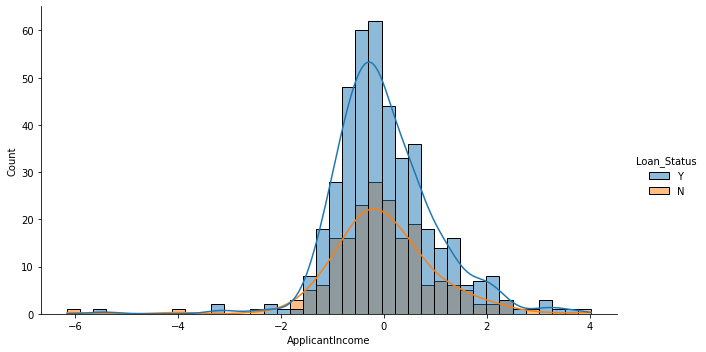

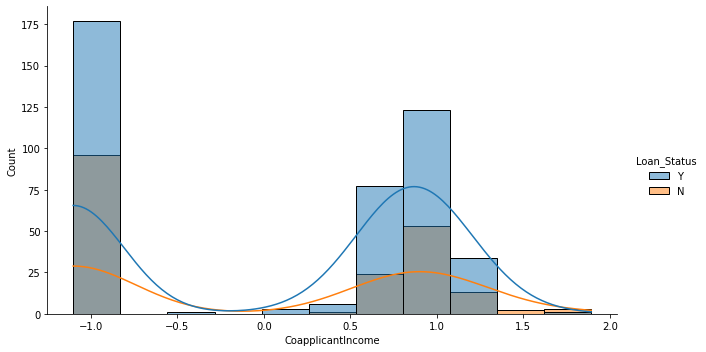

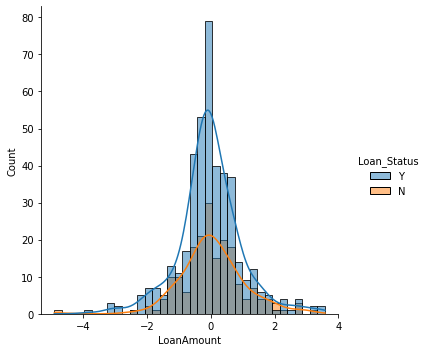

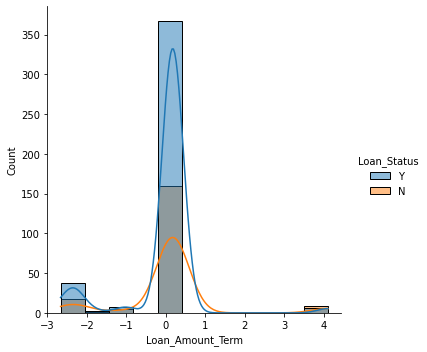

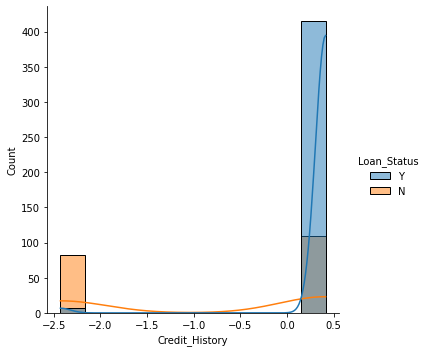

In [19]:
# after transformation
for i in numerical:
    if i=='ApplicantIncome' or i=='CoapplicantIncome':
        sns.displot(data=df, x=i, kde=True,aspect=20/11.27,hue='Loan_Status')
    else:
        sns.displot(data=df, x=i, kde=True,hue='Loan_Status')

In [20]:
#unique types in categorical variables
for i in categorical:
    print(i,":" ,len(df[i].unique()))

Gender : 2
Married : 2
Dependents : 4
Education : 2
Self_Employed : 2
property_Area : 3
Loan_Status : 2


In [21]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
0,Male,No,0,Graduate,No,0.545668,-1.102801,-0.025462,0.175540,0.411733,Urban,Y
1,Male,Yes,1,Graduate,No,-0.118293,0.750974,-0.025462,0.175540,0.411733,Rural,N
2,Male,Yes,0,Graduate,Yes,-0.498694,-1.102801,-1.339826,0.175540,0.411733,Urban,Y
3,Male,Yes,0,Not Graduate,No,-0.742697,0.892077,-0.155876,0.175540,0.411733,Urban,Y
4,Male,No,0,Graduate,No,0.584147,-1.102801,0.170931,0.175540,0.411733,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,-0.553641,-1.102801,-1.197589,0.175540,0.411733,Rural,Y
610,Male,Yes,3+,Graduate,No,0.001065,-1.102801,-2.296436,-2.312879,0.411733,Rural,Y
611,Male,Yes,1,Graduate,No,1.024698,0.208980,1.381387,0.175540,0.411733,Urban,Y
612,Male,Yes,2,Graduate,No,0.932994,-1.102801,0.750522,0.175540,0.411733,Urban,Y


In [22]:
d={'Male':1,'Female':0,'Yes':1,'No':0,'Graduate':1,'Not Graduate':0,'Y':1,'N':0}

In [23]:
df.replace(d,inplace=True)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
0,1,0,0,1,0,0.545668,-1.102801,-0.025462,0.175540,0.411733,Urban,1
1,1,1,1,1,0,-0.118293,0.750974,-0.025462,0.175540,0.411733,Rural,0
2,1,1,0,1,1,-0.498694,-1.102801,-1.339826,0.175540,0.411733,Urban,1
3,1,1,0,0,0,-0.742697,0.892077,-0.155876,0.175540,0.411733,Urban,1
4,1,0,0,1,0,0.584147,-1.102801,0.170931,0.175540,0.411733,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,-0.553641,-1.102801,-1.197589,0.175540,0.411733,Rural,1
610,1,1,3+,1,0,0.001065,-1.102801,-2.296436,-2.312879,0.411733,Rural,1
611,1,1,1,1,0,1.024698,0.208980,1.381387,0.175540,0.411733,Urban,1
612,1,1,2,1,0,0.932994,-1.102801,0.750522,0.175540,0.411733,Urban,1


In [24]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
0,1,0,0,1,0,0.545668,-1.102801,-0.025462,0.175540,0.411733,Urban,1
1,1,1,1,1,0,-0.118293,0.750974,-0.025462,0.175540,0.411733,Rural,0
2,1,1,0,1,1,-0.498694,-1.102801,-1.339826,0.175540,0.411733,Urban,1
3,1,1,0,0,0,-0.742697,0.892077,-0.155876,0.175540,0.411733,Urban,1
4,1,0,0,1,0,0.584147,-1.102801,0.170931,0.175540,0.411733,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,-0.553641,-1.102801,-1.197589,0.175540,0.411733,Rural,1
610,1,1,3+,1,0,0.001065,-1.102801,-2.296436,-2.312879,0.411733,Rural,1
611,1,1,1,1,0,1.024698,0.208980,1.381387,0.175540,0.411733,Urban,1
612,1,1,2,1,0,0.932994,-1.102801,0.750522,0.175540,0.411733,Urban,1


In [25]:
df['Dependents']=df.apply(lambda x:str(x['Dependents']).split('+')[0],axis=1)

In [26]:
df['Dependents']=pd.to_numeric(df['Dependents'])

In [27]:
df['property_Area']=df.apply(lambda x:0 if x['property_Area']=='Urban' else 1 if x['property_Area']=='Semiurban' else 2 ,axis=1)

In [28]:
df['property_Area']=pd.to_numeric(df['property_Area'])

In [29]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
0,1,0,0,1,0,0.545668,-1.102801,-0.025462,0.175540,0.411733,0,1
1,1,1,1,1,0,-0.118293,0.750974,-0.025462,0.175540,0.411733,2,0
2,1,1,0,1,1,-0.498694,-1.102801,-1.339826,0.175540,0.411733,0,1
3,1,1,0,0,0,-0.742697,0.892077,-0.155876,0.175540,0.411733,0,1
4,1,0,0,1,0,0.584147,-1.102801,0.170931,0.175540,0.411733,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,-0.553641,-1.102801,-1.197589,0.175540,0.411733,2,1
610,1,1,3,1,0,0.001065,-1.102801,-2.296436,-2.312879,0.411733,2,1
611,1,1,1,1,0,1.024698,0.208980,1.381387,0.175540,0.411733,0,1
612,1,1,2,1,0,0.932994,-1.102801,0.750522,0.175540,0.411733,0,1


In [30]:
# scaling
s=StandardScaler()
df[numerical]=s.fit_transform(df[numerical])
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
0,1,0,0,1,0,0.545668,-1.102801,-0.025462,0.175540,0.411733,0,1
1,1,1,1,1,0,-0.118293,0.750974,-0.025462,0.175540,0.411733,2,0
2,1,1,0,1,1,-0.498694,-1.102801,-1.339826,0.175540,0.411733,0,1
3,1,1,0,0,0,-0.742697,0.892077,-0.155876,0.175540,0.411733,0,1
4,1,0,0,1,0,0.584147,-1.102801,0.170931,0.175540,0.411733,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,-0.553641,-1.102801,-1.197589,0.175540,0.411733,2,1
610,1,1,3,1,0,0.001065,-1.102801,-2.296436,-2.312879,0.411733,2,1
611,1,1,1,1,0,1.024698,0.208980,1.381387,0.175540,0.411733,0,1
612,1,1,2,1,0,0.932994,-1.102801,0.750522,0.175540,0.411733,0,1


### Feature Selection

In [31]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,-0.045364,-0.000525,0.086712,0.219520,0.142137,-0.080405,0.009170,0.025752,0.017987
Married,0.364569,1.000000,0.334216,-0.012304,0.004489,0.017509,0.312487,0.179350,-0.123179,0.010938,-0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,-0.055752,0.056798,0.112119,-0.002307,0.158592,-0.102927,-0.040160,0.000244,0.010118
Education,-0.045364,-0.012304,-0.055752,1.000000,0.010383,0.177587,-0.038540,0.149533,0.057505,0.073658,-0.065243,0.085884
Self_Employed,-0.000525,0.004489,0.056798,0.010383,1.000000,0.185892,-0.089792,0.111002,-0.038754,-0.001550,0.030860,-0.003700
ApplicantIncome,0.086712,0.017509,0.112119,0.177587,0.185892,1.000000,-0.366808,0.483421,-0.054629,0.012190,0.029576,0.013839
CoapplicantIncome,0.219520,0.312487,-0.002307,-0.038540,-0.089792,-0.366808,1.000000,0.137093,0.004528,0.007393,0.055712,0.056728
LoanAmount,0.142137,0.179350,0.158592,0.149533,0.111002,0.483421,0.137093,1.000000,0.058125,-0.016884,0.092640,-0.038533
Loan_Amount_Term,-0.080405,-0.123179,-0.102927,0.057505,-0.038754,-0.054629,0.004528,0.058125,1.000000,-0.013188,0.044168,-0.053574
Credit_History,0.009170,0.010938,-0.040160,0.073658,-0.001550,0.012190,0.007393,-0.016884,-0.013188,1.000000,-0.001963,0.540556


In [32]:
# removing constant features
constant=[i for i in df.columns if df[i].std()==0 ]
df.drop(columns=constant,inplace=True,axis=1)

In [33]:
# removing quasi-constant
sel=VarianceThreshold(threshold=0.01)
sel.fit(df)
sel.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [34]:
df=sel.transform(df)
df.shape

(614, 12)

In [35]:
df=pd.DataFrame(df)
df.columns=df1.columns
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
0,1.0,0.0,0.0,1.0,0.0,0.545668,-1.102801,-0.025462,0.175540,0.411733,0.0,1.0
1,1.0,1.0,1.0,1.0,0.0,-0.118293,0.750974,-0.025462,0.175540,0.411733,2.0,0.0
2,1.0,1.0,0.0,1.0,1.0,-0.498694,-1.102801,-1.339826,0.175540,0.411733,0.0,1.0
3,1.0,1.0,0.0,0.0,0.0,-0.742697,0.892077,-0.155876,0.175540,0.411733,0.0,1.0
4,1.0,0.0,0.0,1.0,0.0,0.584147,-1.102801,0.170931,0.175540,0.411733,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,1.0,0.0,-0.553641,-1.102801,-1.197589,0.175540,0.411733,2.0,1.0
610,1.0,1.0,3.0,1.0,0.0,0.001065,-1.102801,-2.296436,-2.312879,0.411733,2.0,1.0
611,1.0,1.0,1.0,1.0,0.0,1.024698,0.208980,1.381387,0.175540,0.411733,0.0,1.0
612,1.0,1.0,2.0,1.0,0.0,0.932994,-1.102801,0.750522,0.175540,0.411733,0.0,1.0


In [36]:
# correlation Check

f1=[]
f2=[]
corr=[]
for i,j in df.corr().to_dict().items():
    for x,y in j.items():
        if y!=float(1):
            f1.append(i)
            f2.append(x)
            corr.append(y)
            
correlation=pd.DataFrame({'f1':f1,'f2':f2,'corr':corr})
correlation.sort_values(by='corr',ascending=False)


,f1,f2,corr
130,Loan_Status,Credit_History,0.540556
109,Credit_History,Loan_Status,0.540556
82,LoanAmount,ApplicantIncome,0.483421
61,ApplicantIncome,LoanAmount,0.483421
0,Gender,Married,0.364569
...,...,...,...
90,Loan_Amount_Term,Dependents,-0.102927
18,Married,Loan_Amount_Term,-0.123179
89,Loan_Amount_Term,Married,-0.123179
60,ApplicantIncome,CoapplicantIncome,-0.366808


### Tuning & Model Building 

In [37]:
X_train,X_test,y_train,y_test=train_test_split(df.drop(labels=['Loan_Status'],axis=1),df['Loan_Status'],test_size=0.2,random_state=0)

In [38]:
import numpy as np
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,
'max_features': max_features,
'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [39]:
rf = RandomForestClassifier()

In [40]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [41]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=5; total t

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

In [42]:
print ('Random grid: ', random_grid, '\n')
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [5, 20, 50, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 60, 'bootstrap': True}  



In [43]:
def random_forest(X_train,X_test,y_train,y_test):
    rf=RandomForestClassifier(n_estimators= 100, min_samples_split= 10, min_samples_leaf= 4, max_features= 'sqrt', max_depth= 20, bootstrap= True)
    rf.fit(X_train,y_train)
    
    
    pred=rf.predict(X_train)
    print('Train Set Accuracy : ', accuracy_score(y_train,pred))

    pred=rf.predict(X_test)
    print('Test Set Accuracy : ',accuracy_score(y_test,pred))

random_forest(X_train,X_test,y_train,y_test)

Train Set Accuracy :  0.8329938900203666
Test Set Accuracy :  0.8211382113821138
